<a href="https://colab.research.google.com/github/Marlenijournal/PML_UTS_DesicionTree_OrangeGrape/blob/main/069_MarleniSukarya_DecitionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marleni Sukarya
# 1227050069
# Prak. ML
# Desicion Tree

In [1]:
!pip install --upgrade gspread gspread_dataframe

import pandas as pd
import numpy as np
import gspread
from gspread_dataframe import get_as_dataframe
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [5]:
import pandas as pd

sheet_url = "https://docs.google.com/spreadsheets/d/1s89IT5_tYSxr8U3iNXoRCGwuneD3qXxe9KDL85BEMN8/export?format=csv"

df = pd.read_csv(sheet_url)

df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [8]:
print(df['name'].unique())

df['name'] = df['name'].map({'orange': 0, 'grapefruit': 1})

X = df.drop('name', axis=1)
y = df['name']


['orange' 'grapefruit']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))


Akurasi: 0.9435
Confusion Matrix:
 [[949  63]
 [ 50 938]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      1012
           1       0.94      0.95      0.94       988

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



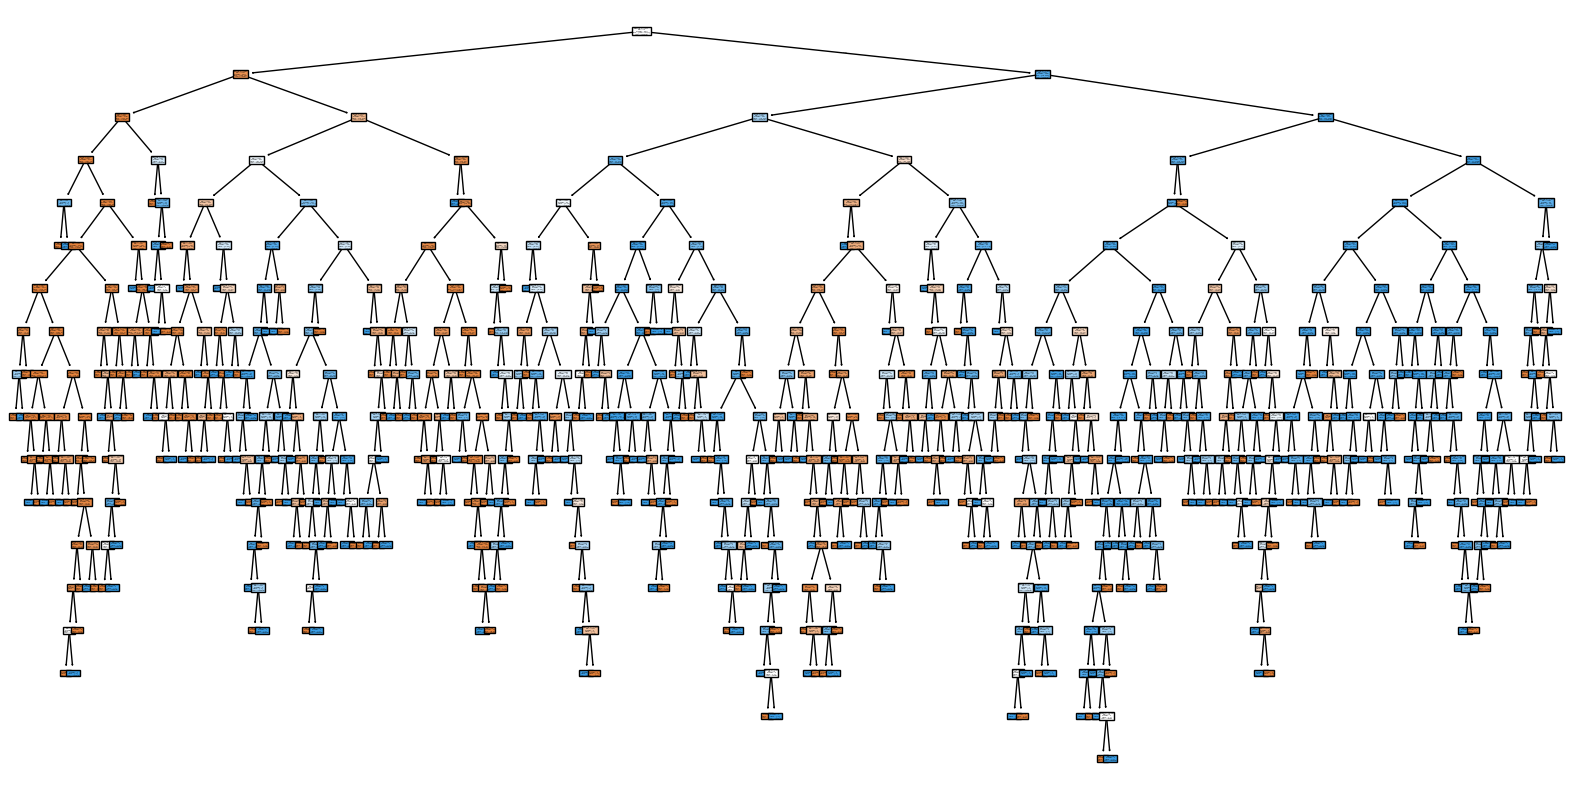

In [12]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=["orange", "grapefruit"], filled=True)
plt.show()